In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD
%matplotlib inline

In [45]:
!git clone 'https://github.com/sachinkavindaa/Machine-learning-with-Python'

fatal: destination path 'Machine-learning-with-Python' already exists and is not an empty directory.


In [46]:
df = pd.read_csv('/content/Machine-learning-with-Python/ML/Diabetes/diabetes.csv')
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


there are lot of patients representing age in 22.

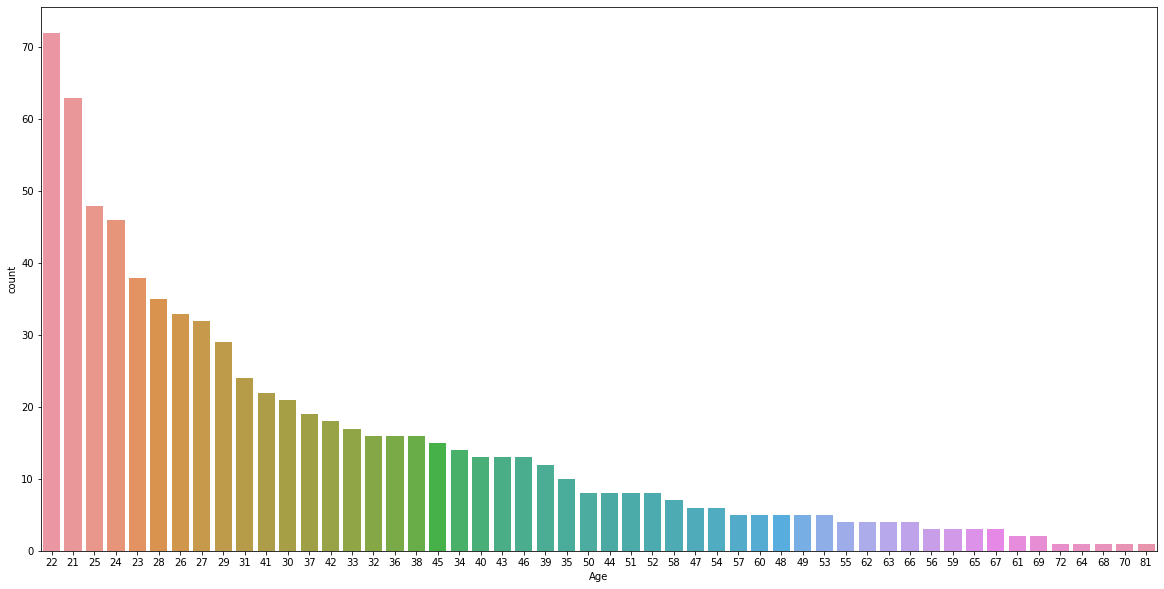

In [47]:
plt.figure(figsize=(20,10)) 
sns.countplot(x = 'Age', data = df, order = df['Age'].value_counts().index)

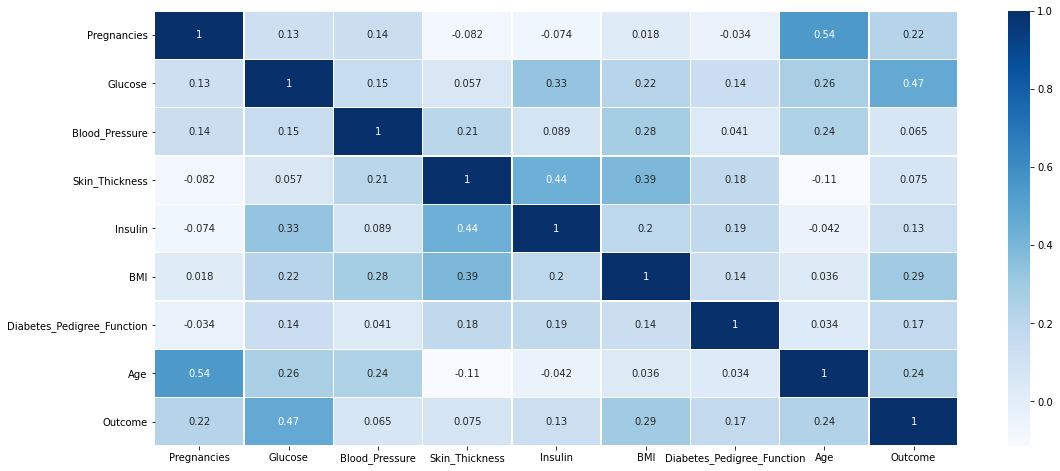

In [48]:
corr=df.corr()
plt.figure(figsize=(18,8)) 
sns.heatmap(corr,cmap="Blues",linewidths=.5, annot=True)

In [49]:
df_mod = df[(df.Blood_Pressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)

(724, 9)


In [50]:
feature_names = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome

In [51]:
#def min_max_scaling(df_mod):
    
    #df_norm = df_mod.copy()
    
    
    #for column in df_norm.columns:
        #df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    #return df_norm

#df_scaled = min_max_scaling(df_mod)

#df_scaled

In [52]:
feature_names = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age']
X = df_mod[feature_names]
y = df_mod.Outcome

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)


In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder


In [56]:
model = Sequential()

model.add(Dense(8, input_dim = 8,  activation = 'relu'))
#keras.layers.Dropout(0.2)
#model.add(Dense(4, activation='relu'))
#keras.layers.Dropout(0.2)
#model.add(Dense(2, activation='relu'))
#keras.layers.Dropout(0.2)
#model.add(Dense(2, activation='relu'))


#keras.layers.Dropout(0.2)
#model.add(Dense(7, activation = 'relu'))
#keras.layers.Dropout(0.3)
#model.add(Dense(4, activation = 'relu'))
#model.add(Dense(164, activation = 'relu'))
#keras.layers.Dropout(0.35
model.add(Dense(1, activation = 'sigmoid'))

This is a nice tool to view the model we have created and count the parameters.

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(optimizer= 'rmsprop', loss ='binary_crossentropy',metrics='accuracy' ) 


In [59]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs = 1000, batch_size=101)

Epoch 1/1000
6/6 [==============================] - 1s 28ms/step - loss: 0.6863 - accuracy: 0.5834 - val_loss: 0.6786 - val_accuracy: 0.5635
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.6732 - accuracy: 0.5847 - val_loss: 0.6627 - val_accuracy: 0.5912
Epoch 3/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6468 - accuracy: 0.6256 - val_loss: 0.6488 - val_accuracy: 0.6077
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6345 - accuracy: 0.6510 - val_loss: 0.6373 - val_accuracy: 0.6298
Epoch 5/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6281 - accuracy: 0.6633 - val_loss: 0.6259 - val_accuracy: 0.6464
Epoch 6/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6163 - accuracy: 0.6664 - val_loss: 0.6161 - val_accuracy: 0.6630
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.6049 - accuracy: 0.6853 - val_loss: 0.6069 - val_accuracy: 0.6519
Epoch 8/1000
6/6 [=

In [60]:
from tensorflow.keras.models import load_model

In [61]:
loss_df = pd.DataFrame(model.history.history)

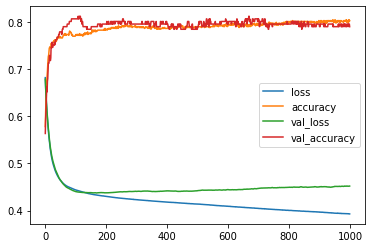

In [62]:
loss_df.plot()



In [63]:
val_loss = model.history.history['val_loss']
t_loss = model.history.history['loss']

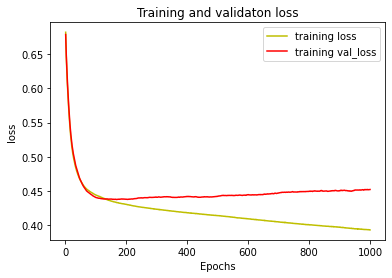

In [64]:

epochs = range(1,len(t_loss)+1)
plt.plot(epochs,t_loss,'y',label = 'training loss')
plt.plot(epochs,val_loss,'r',label = 'training val_loss')
plt.title("Training and validaton loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [65]:
t_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

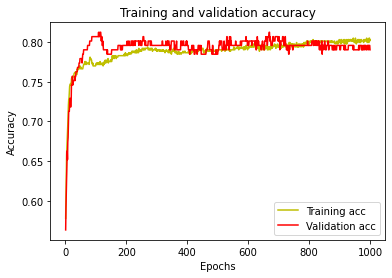

In [66]:

plt.plot(epochs, t_acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
mythreshold=0.395826
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)  
print(cm)

[[90 30]
 [15 46]]


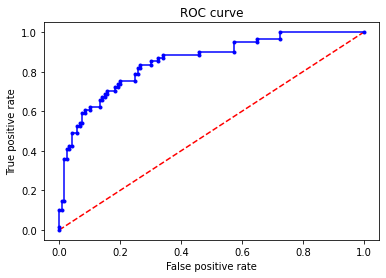

In [73]:
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr,'b', marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [74]:
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal threshold is:  37    0.395826
Name: thresholds, dtype: float32


In [75]:
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)


Area under curve, AUC =  0.853551912568306


In [71]:
accuarcy = model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4521 - accuracy: 0.7901
